In [1]:
!pip install jieba wordcloud matplotlib

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1d0icZW1GNIKUM_g1UYubsuWufD2So3dw6kxCTgaTtkA/edit?usp=sharing')
# 從 gsheets 的工作表1載入 sheets1
sheets1 = gsheets.worksheet('工作表1').get_all_values()
# 將 sheets1,sheets2,sheets3, 資料載入 pd 的 DataFrame 進行分析
df1 = pd.DataFrame(sheets1[1:], columns=sheets1[0])

In [3]:
text = df1.columns[0]
text

'台中逢甲、東海等大學近期傳出多名學生遭「無卡分期」集體詐騙。林姓嫌犯透過投資手機、電腦為由，鼓吹學生填寫無卡分期契約，甚至還有北部的學生聽聞簽名就能拿錢，專程南下賺5000元，結果因而欠了上萬債務。\n\n警方指出，通訊行業務員向學生謊稱只需被害人申辦手機或購買筆電等三Ｃ產品，並填寫10萬元無卡分期貸款合約書，即可賺取現金5000元，東海大學還有一名學生拉20名同學一起賺5000元，結果開始被融資公司催討債務後，才知道竟是一場騙局。\n\n據《聯合新聞網》報導，台北大學犯罪學研究所副教授沈伯洋表示，這樣的詐騙手法其實很久以前就存在了，但因是熟人拉攏，學生間沒有戒心，因此很容易上當受騙。另外，近年詐騙手法推陳出新，警政署等也多宣傳於最新的網路詐騙方式，反而讓人對老式的詐騙失去戒心。\n\n報導指出，台師大學務處專責導師室執行長黃志祥透露，通常大學生多會有想實現自己、賺點錢的念頭，但社會歷練仍不足，且該案還涉及債權轉移、利息等問題，也可能是學生金融知識較不足而誤信。\n\n教育部表示，近期接獲9校的14件校安通報，共有89人遭詐騙，已透過大專校安聯繫群組，請各大專校院立即進行校內清查，如有疑似遭詐騙個案應及時通報；同時呼籲學生提高警覺，若遭詐騙應儘快向學校反映，並儘速向警方報案。有多所大學近期傳出學生自傷案，大學導師能否有效解決學生的心理問題，再次引起討論。事實上，目前全台已有五所大學，在導生制外再設置專責導師。以最早創立這個制度的台師大來說，全校35位專責導師，一人負責一個系，平時進行初級輔導，發現高關懷學生再由學校機制介入。\n\n隔著透明隔板，學生和專責導師談心，在台師大只要是上課日，好幾張小桌子不會空太久。\n\n台師大學生曹同學說：「我自己是蠻喜歡找類似輔導老師這樣子的人，但目前是還沒有去過，可是經過的時候會看到，很多人在就是在那邊跟專責導師講話這樣。」\n\n學生有煩惱時想和人談談就過來，對學生來說，不像去心輔中心要等好久。此外，若有緊急狀況，專責導師辦公室還有24小時輪值。\n\n台師大表示，六年前首創專責導師制，目前35位滿編，分別具有心理諮商、輔導和教育專長，其中七位是教官轉職，嫻熟校安事務。平常一位老師負責大學部一個系，主動融入系上活動，也會去訪視在外租屋的學生。\n\n台師大學務處專責導師室執行長黃志祥說明，「他跟學生就有一種很親密的關係，學生就

In [4]:
import re
import string

cleaned_text = re.sub(r'[。|：|「|（|）|，|\n|」|有|也|是|但|在|\r|會|就|等|表示|、|就]+'.format(re.escape(string.punctuation)), '', text)
cleaned_text = cleaned_text.replace("的", "")
cleaned_text

'台中逢甲東海大學近期傳出多名學生遭無卡分期集體詐騙林姓嫌犯透過投資手機電腦為由鼓吹學生填寫無卡分期契約甚至還北部學生聽聞簽名能拿錢專程南下賺5000元結果因而欠了上萬債務警方指出通訊行業務員向學生謊稱只需被害人申辦手機或購買筆電三Ｃ產品並填寫10萬元無卡分期貸款合約書即可賺取現金5000元東海大學還一名學生拉20名同學一起賺5000元結果開始被融資公司催討債務後才知道竟一場騙局據《聯合新聞網》報導台北大學犯罪學研究所副教授沈伯洋這樣詐騙手法其實很久以前存了因熟人拉攏學生間沒戒心因此很容易上當受騙另外近年詐騙手法推陳出新警政署多宣傳於最新網路詐騙方式反而讓人對老式詐騙失去戒心報導指出台師大學務處專責導師室執行長黃志祥透露通常大學生多想實現自己賺點錢念頭社歷練仍不足且該案還涉及債權轉移利息問題可能學生金融知識較不足而誤信教育部近期接獲9校14件校安通報共89人遭詐騙已透過大專校安聯繫群組請各大專校院立即進行校內清查如疑似遭詐騙個案應及時通報；同時呼籲學生提高警覺若遭詐騙應儘快向學校反映並儘速向警方報案多所大學近期傳出學生自傷案大學導師能否效解決學生心理問題再次引起討論事實上目前全台已五所大學導生制外再設置專責導師以最早創立這個制度台師大來說全校35位專責導師一人負責一個系平時進行初級輔導發現高關懷學生再由學校機制介入隔著透明隔板學生和專責導師談心台師大只要上課日好幾張小桌子不空太久台師大學生曹同學說我自己蠻喜歡找類似輔導老師這樣子人目前還沒去過可經過時候看到很多人那邊跟專責導師講話這樣學生煩惱時想和人談談過來對學生來說不像去心輔中心要好久此外若緊急狀況專責導師辦公室還24小時輪值台師大六年前首創專責導師制目前35位滿編分別具心理諮商輔導和教育專長其中七位教官轉職嫻熟校安事務平常一位老師負責大學部一個系主動融入系上活動去訪視外租屋學生台師大學務處專責導師室執行長黃志祥說明他跟學生一種很親密關係學生很願意分享他心情或分享一些他狀況其他同學看到這樣狀況很快反映到專責老師這邊來若發現高關懷學生轉到心輔或醫由整個機制來介入學務處六年多來幫了不少學生光去年初級輔導9萬多人次而專責導師減輕一般導師負擔台師大學務長林玫君我們很多老師他因為升啊教學研究其實說真比較忙所以他要去照顧到一個班學生五六十個人然後要花時間很辛苦台師大學務處說專責導師室一年1千4百萬經費很大一部分從導師費挪一半過

In [5]:
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
seg_list = jieba.cut(cleaned_text, cut_all=False)
words = list(seg_list)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.886 seconds.
DEBUG:jieba:Loading model cost 0.886 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [7]:
words

['台',
 '中',
 '逢甲',
 '東',
 '海大',
 '學',
 '近期',
 '傳出',
 '多名',
 '學生',
 '遭無卡',
 '分期',
 '集體',
 '詐騙',
 '林姓',
 '嫌犯',
 '透過',
 '投資手',
 '機電腦',
 '為',
 '由',
 '鼓吹',
 '學生',
 '填寫',
 '無卡',
 '分期',
 '契約',
 '甚至',
 '還',
 '北部',
 '學生',
 '聽聞',
 '簽名',
 '能',
 '拿',
 '錢',
 '專程',
 '南下',
 '賺',
 '5000',
 '元',
 '結果',
 '因而',
 '欠',
 '了',
 '上',
 '萬',
 '債務',
 '警方',
 '指出',
 '通訊',
 '行業務員',
 '向',
 '學生',
 '謊稱',
 '只',
 '需',
 '被害人',
 '申辦',
 '手機',
 '或',
 '購買',
 '筆電三',
 'Ｃ',
 '產品',
 '並填寫',
 '10',
 '萬元',
 '無卡',
 '分期',
 '貸款',
 '合約書',
 '即可',
 '賺取',
 '現金',
 '5000',
 '元東',
 '海大',
 '學還',
 '一名',
 '學生',
 '拉',
 '20',
 '名同學',
 '一起',
 '賺',
 '5000',
 '元',
 '結果',
 '開始',
 '被',
 '融資',
 '公司',
 '催討',
 '債務後才',
 '知道',
 '竟一場',
 '騙',
 '局據',
 '《',
 '聯合',
 '新聞網',
 '》',
 '報導',
 '台北',
 '大學',
 '犯罪',
 '學',
 '研究所',
 '副教授',
 '沈伯洋',
 '這樣',
 '詐騙',
 '手法',
 '其實',
 '很久以前',
 '存',
 '了',
 '因',
 '熟人',
 '拉攏',
 '學生間',
 '沒',
 '戒心',
 '因此',
 '很',
 '容易',
 '上',
 '當受',
 '騙',
 '另外',
 '近年',
 '詐騙',
 '手法',
 '推陳',
 '出新',
 '警政署',
 '多',
 '宣傳',
 '於',
 '最新',
 '網路',
 '詐騙',
 '方式',
 '反

In [8]:
word_freq = Counter(words)
print(word_freq)

Counter({' ': 51, '學生': 46, '心理': 32, '教官': 27, '導師': 24, '專責導師': 22, '輔導': 20, '台師': 18, '專責導': 18, '制度': 18, '=': 16, '大學': 13, '問題': 12, '大': 12, '請': 12, '不': 12, '與': 12, '多': 11, '於': 11, '對': 11, '目前': 11, '校園': 11, '來': 10, '狀況': 10, '假': 10, '讓': 9, '說': 9, '和': 9, '諮': 9, '他': 9, '專業': 9, '上': 8, '或': 8, '生活': 8, '『': 8, '』': 8, '學': 7, '為': 7, '了': 7, '一名': 7, '人': 7, '討論': 7, '我們': 7, '都': 7, '中': 6, '很': 6, '師室': 6, '可能': 6, '已': 6, '時': 6, '若': 6, '好': 6, '我': 6, '老師': 6, '跟': 6, '去': 6, '希望': 6, '教師': 6, '軍訓室': 6, '詐騙': 5, '由': 5, '能': 5, '指出': 5, '騙': 5, '想': 5, '較': 5, '教育部': 5, '；': 5, '再': 5, '這個': 5, '一個': 5, '發現': 5, '時候': 5, '心輔': 5, '要': 5, '林玫君': 5, '範大學': 5, '學術': 5, '台大': 5, '工作': 5, '推動': 5, '壓力': 5, '退出': 5, '規畫': 5, '近期': 4, '透過': 4, '20': 4, '報導': 4, '其實': 4, '大學生': 4, '自己': 4, '而': 4, '學校': 4, '介入': 4, '很多': 4, '師辦': 4, '公室': 4, '商輔導': 4, '到': 4, '教學': 4, '研究': 4, '院校': 4, '更': 4, '相關': 4, '台灣師': 4, '可': 4, '正式': 4, '提案': 4, '師大': 4, '轉型': 4, '退休': 4, '所'

In [9]:
!apt-get -qq install -y fonts-noto-cjk

Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [10]:
font_path = "/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc"
wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, width=800, height=600)
wordcloud = wc.generate_from_frequencies(word_freq)

(-0.5, 799.5, 599.5, -0.5)

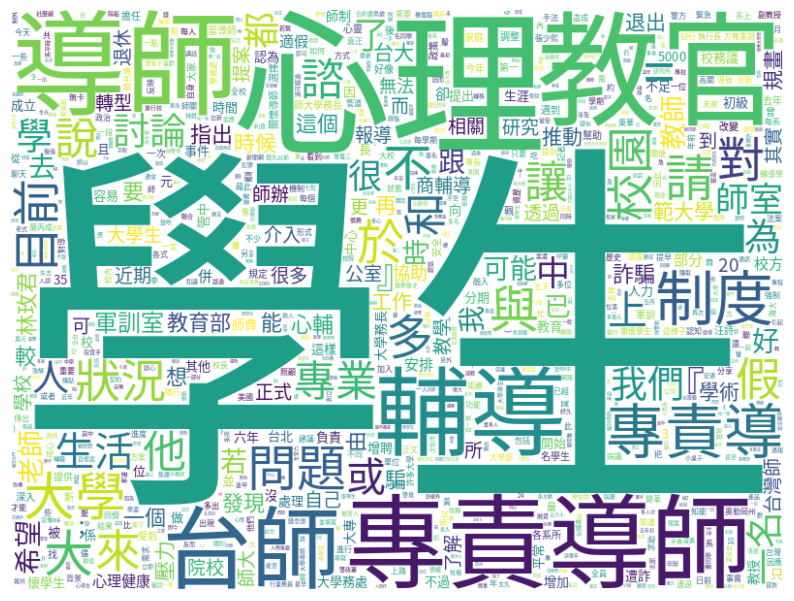

In [11]:
# 显示文字云
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')